<a href="https://colab.research.google.com/github/zahra-sharifzadeh/Digital_Audio_Processing/blob/main/Spectral%20centroid%20and%20bandwidth/Spectral_centroid_and_bandwidth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

from pathlib import Path

import requests
# example source: https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip

def download_data(source: str,
                  destination: str,
                  remove_source: bool = True) -> Path:

  """Download a Zipped dataset from source and unzipe to destination."""
  data_path = Path("data/")
  image_path = data_path / destination

  if image_path.is_dir():
    print(f"[INFO] {image_path} directory already exists, skipping download.")

  else:
    print(f"[INFO] Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)


    target_file = Path(source).name

    with open(data_path/target_file, "wb") as f:
      request = requests.get(source)
      print(f"[INFO] Downloading {target_file} from {source}...")
      f.write(request.content)

    with zipfile.ZipFile(data_path / target_file, "r") as zip_ref:
      print(f"[INFO] Unzipping {target_file} data...")
      zip_ref.extractall(image_path)

    if remove_source:
      os.remove(data_path / target_file)

  return image_path

In [2]:
source_path = "https://github.com/zahra-sharifzadeh/Digital_Audio_Processing/raw/main/Extracting%20Spectrograms%20from%20Audio%20with%20Python/audio.zip"
image_path = download_data(source = source_path,
                  destination = "audio",
                  remove_source = True)

[INFO] Did not find data/audio directory, creating one...
[INFO] Downloading audio.zip from https://github.com/zahra-sharifzadeh/Digital_Audio_Processing/raw/main/Extracting%20Spectrograms%20from%20Audio%20with%20Python/audio.zip...
[INFO] Unzipping audio.zip data...


##Loading Audio

In [3]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

In [4]:
debussy_file = "/content/data/audio/audio/debussy.wav"
duke_file = "/content/data/audio/audio/duke.wav"
redhot_file = "/content/data/audio/audio/redhot.wav"

In [5]:
debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)


In [6]:
ipd.Audio(debussy_file)

##Spectral centroid with librosa

In [7]:
FRAME_SIZE = 1024
HOP_SIZE = 512


In [9]:
sc_debussy = librosa.feature.spectral_centroid(y=debussy,
                                               sr=sr,
                                               n_fft=FRAME_SIZE,
                                               hop_length=HOP_SIZE)[0]
sc_redhot = librosa.feature.spectral_centroid(y=redhot,
                                               sr=sr,
                                               n_fft=FRAME_SIZE,
                                               hop_length=HOP_SIZE)[0]
sc_duke = librosa.feature.spectral_centroid(y=duke,
                                               sr=sr,
                                               n_fft=FRAME_SIZE,
                                               hop_length=HOP_SIZE)[0]

In [10]:
sc_debussy.shape

(1292,)

##Visualising spectral centroid


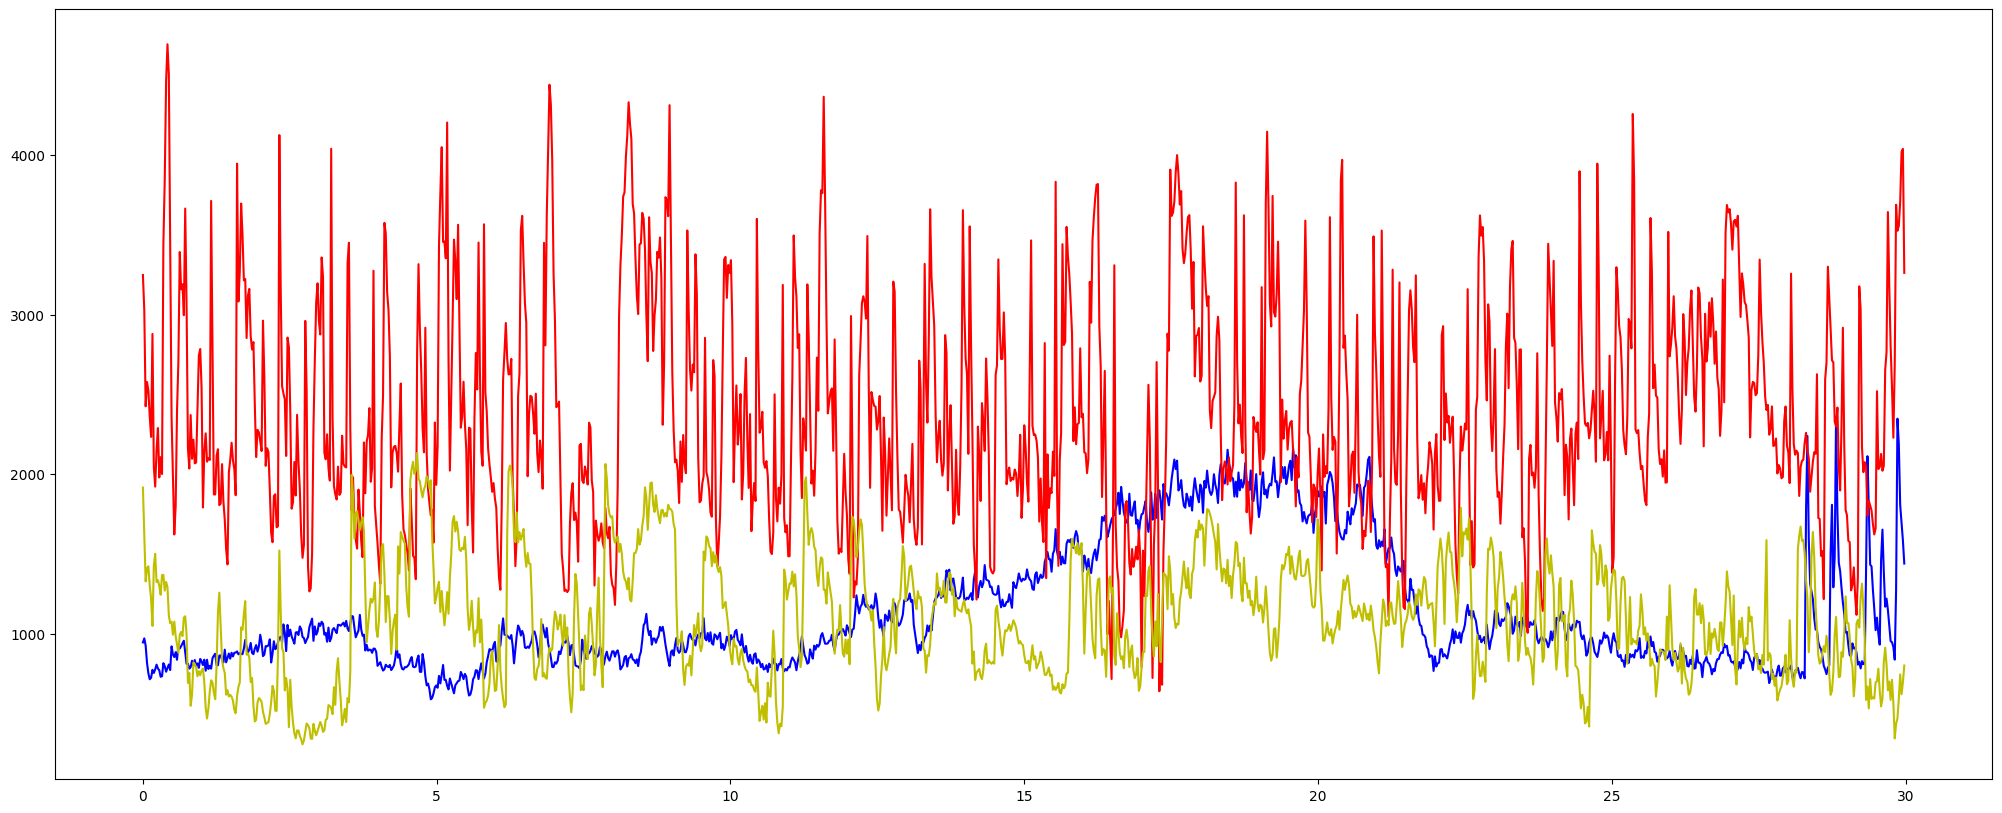

In [12]:
frames = range(len(sc_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)
len(t)

plt.figure(figsize=(25,10))

plt.plot(t, sc_debussy, color='b')
plt.plot(t, sc_redhot, color='r')
plt.plot(t, sc_duke, color='y')

plt.show()

##Spectral bandwidth with Librosa


In [14]:
HOP_LENGTH = HOP_SIZE

In [15]:
ban_debussy = librosa.feature.spectral_bandwidth(y=debussy, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_redhot = librosa.feature.spectral_bandwidth(y=redhot, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_duke = librosa.feature.spectral_bandwidth(y=duke, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [16]:
ban_debussy.shape


(1292,)

##Visualising spectral bandwidth


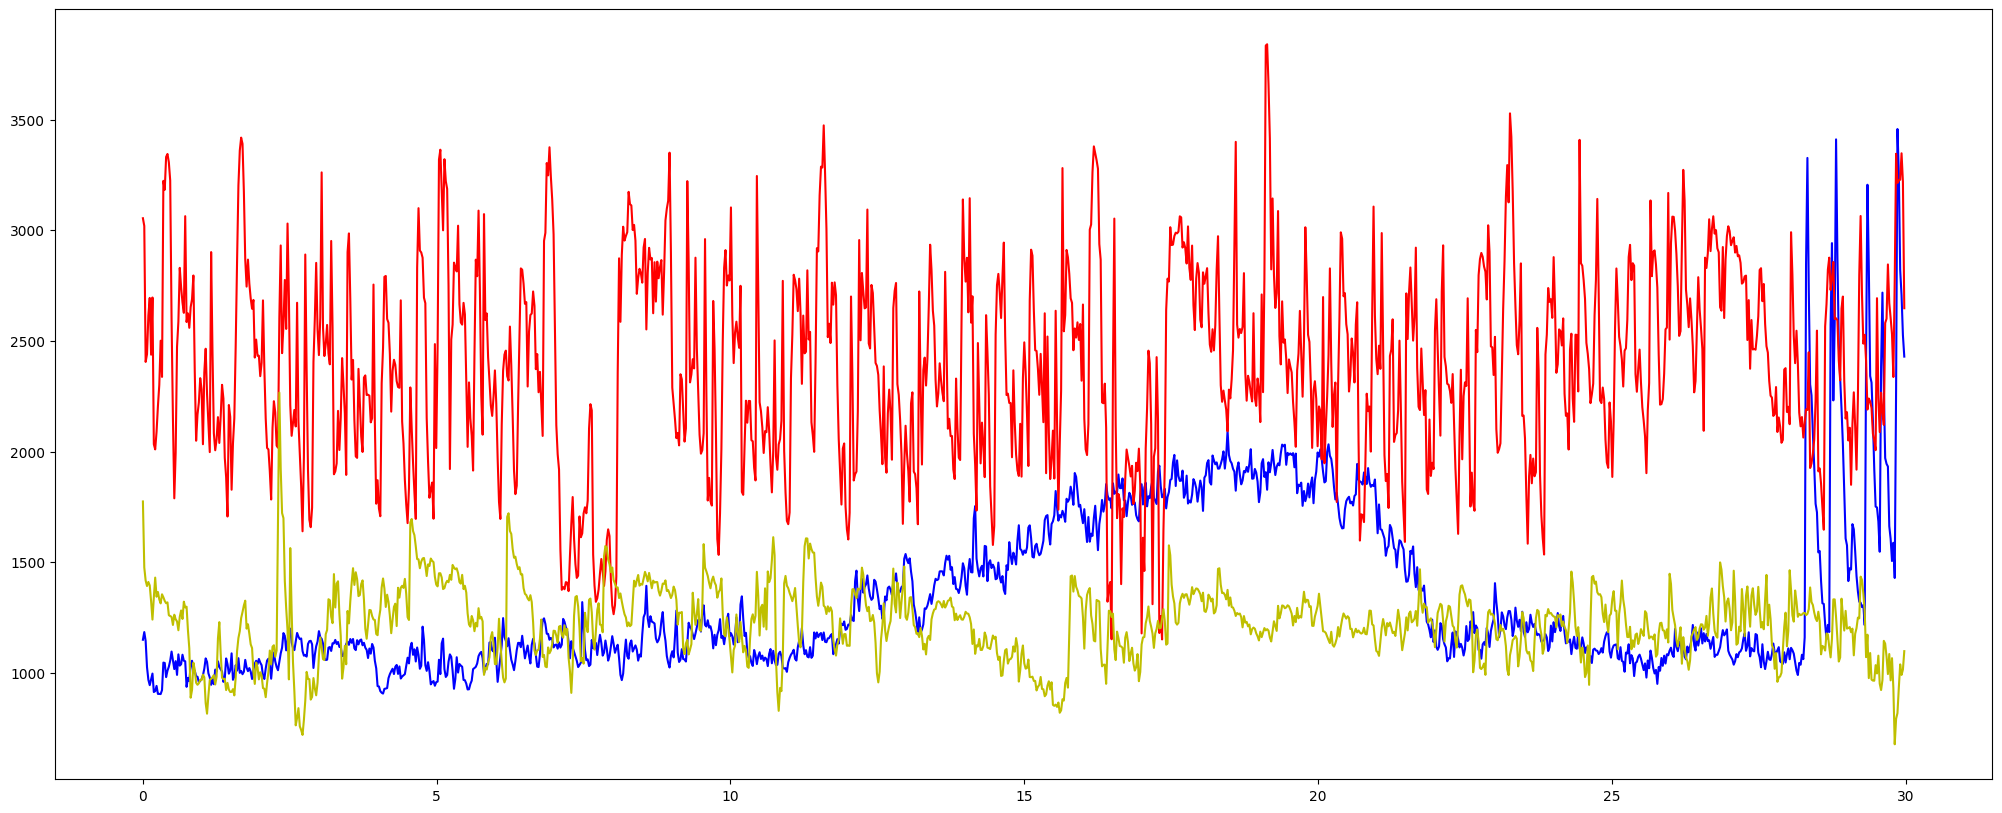

In [17]:
plt.figure(figsize=(25,10))

plt.plot(t, ban_debussy, color='b')
plt.plot(t, ban_redhot, color='r')
plt.plot(t, ban_duke, color='y')

plt.show()